<a href="https://colab.research.google.com/github/marcellamj/soulcode-martech/blob/main/AD2_Banco_de_Dados_Relacionais_e_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos de Banco de Dados Relacionais e SQL**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech AD2

Período: Semana 5

Professor: Douglas Ribeiro

## **Criando um banco de dados MySQL 8.0 na GCP**

*  **Acesse a GCP**: Cloud SQL

*  **Ative a API**: caso necessário

*  **Criar instância**

*  **Card MySQL 8.0**

*  **ID da instância**: nome

*  **Senha:** nenhuma senha

*  **Configuração:**:máquina de desenvolvimento

*  **Personalize sua instância**: mais opções

*  **Proteção de dados**: Desativar proteção contra exclusão

*  **Criar instância**

## **Cloud Shell**

### **Criação do Banco de Dados (escola)**

* Comandos de criação do banco de dados, das tabelas (entidades) e colunas (atributos).



1.   Acessar banco de dados criado na instância
2.   Mostrar os bancos instalados na máquina
3.   Criar bancos de dados: escola
4.   Entrar no banco de dados que deseja usar
5.   Mostrar as tabelas no banco de dados
6.   Criar entidade: alunos
    *   id int not null auto_increment
    *   not null - obrigatório preencher
    *   varchar (30) - limite de caracteres
    *   varchar default 'nome' - caso vazio, preenche automaticamente
    *   date
    *   decimal (3,2) - limite,casas decimais
    *   primary key (id) - conexão com outras entidades
7.   Adicionar valores a alunos - string da linha inteira com todas os atributos
8.   Consultar se alunos foram incluídos na tabela





**SHOW DATABASES**

**USE database**

**SHOW TABLES**

**CREATE TABLE nome**

**INSERT INTO nome**

**SELECT * FROM nome**

**PRIMARY KEY**


In [ ]:
'''
1. gcloud sql connect (nome_da_instancia) --user=root
gcloud sql connect aula22-marcella --user=root
ENTER

2. mysql> SHOW DATABASES;

3. CREATE DATABASE escola;

4. USE escola;

5. SHOW TABLES;

6. CREATE TABLE alunos (
    id int not null auto_increment,
    nome varchar (30) not null,
    nascimento date,
    genero varchar (30),
    peso decimal (5,2),
    altura decimal (3,2),
    nacionalidade varchar (20),
    primary key (id)
);

7. INSERT INTO alunos
   (nome, nascimento, genero, peso, altura, nacionalidade)
   values
   ('Douglas','1976-07-04','M','77.5','1.85','Brasil'),
   ('Maria','1990-07-04','F','70.5','1.75','Espanha');

8. SELECT * FROM alunos;

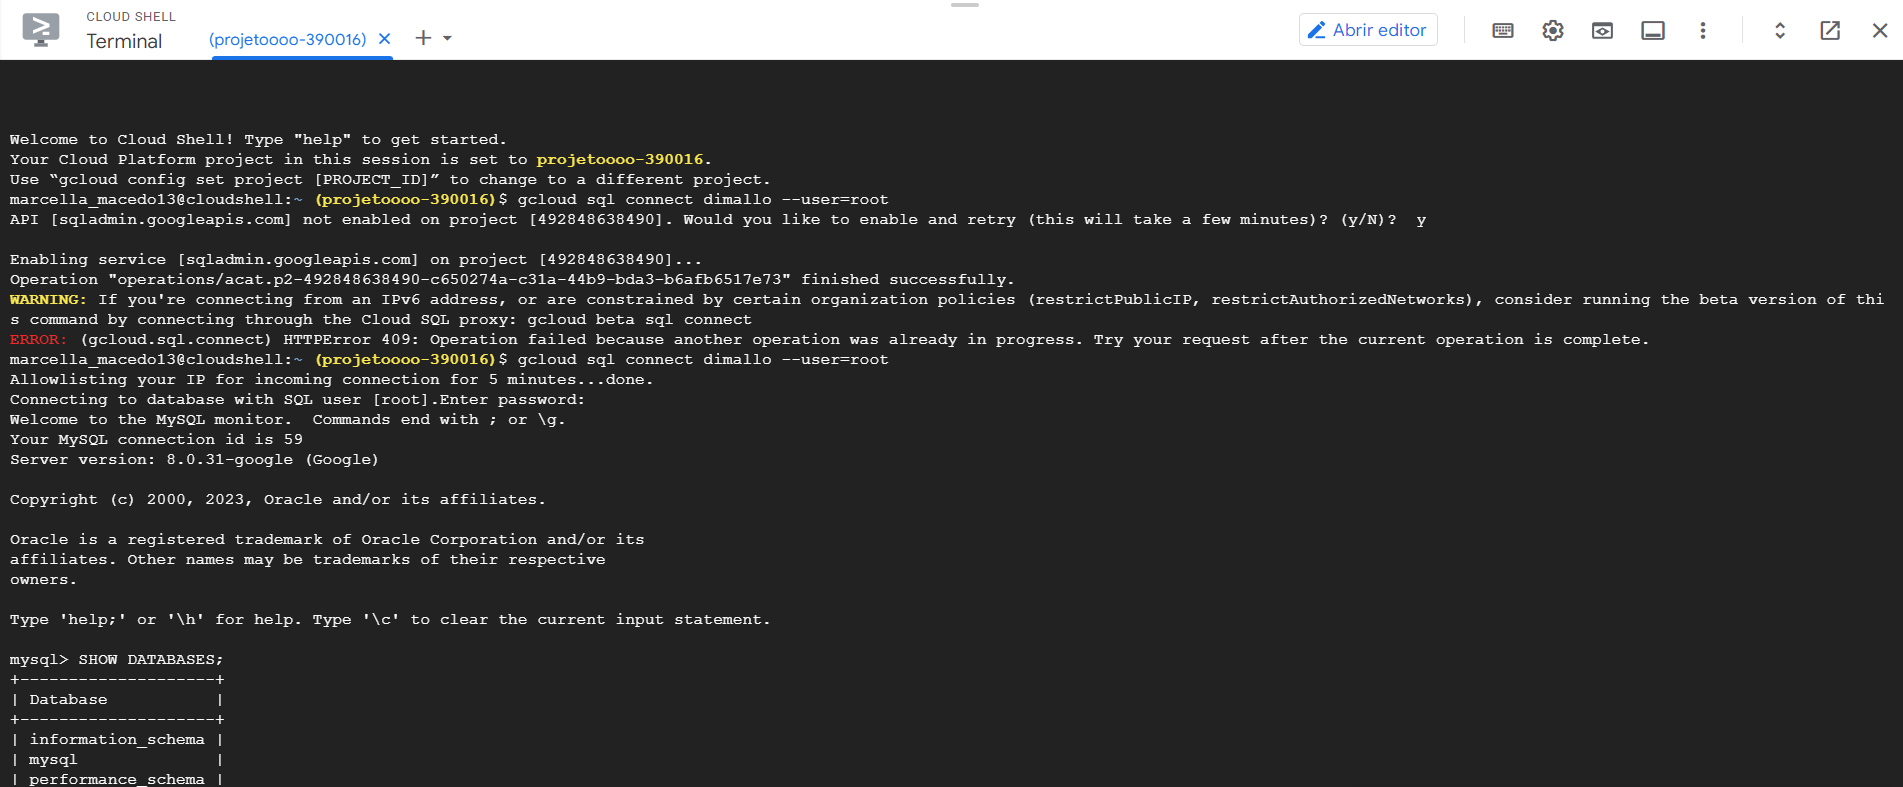

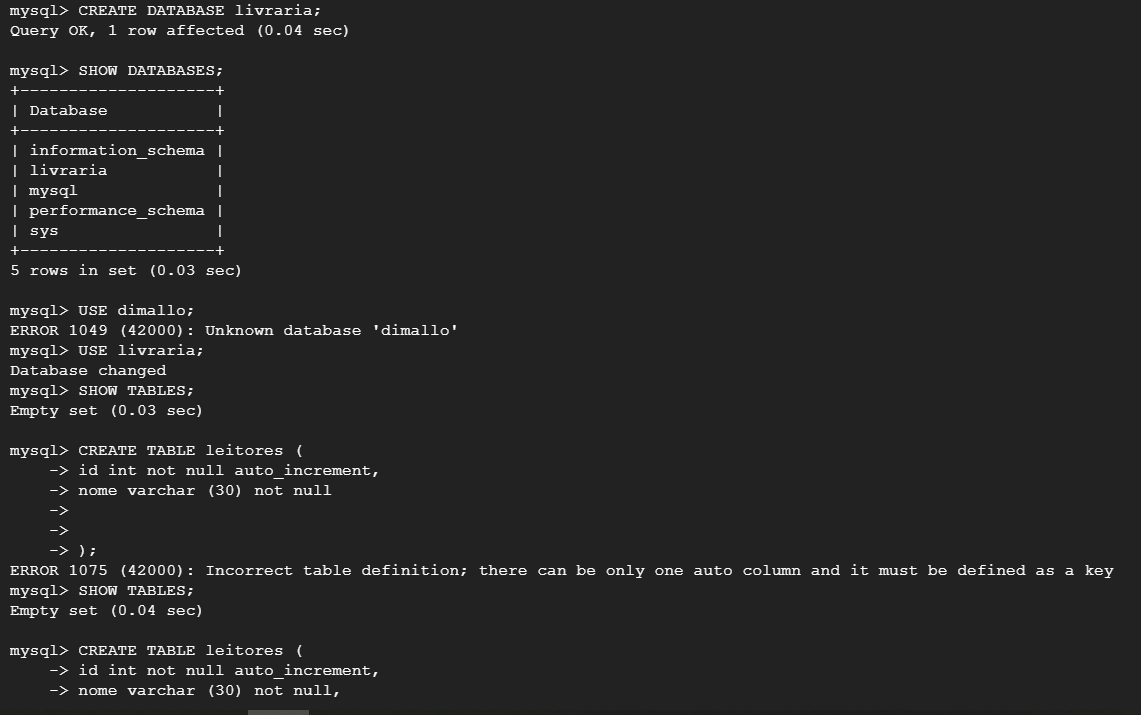

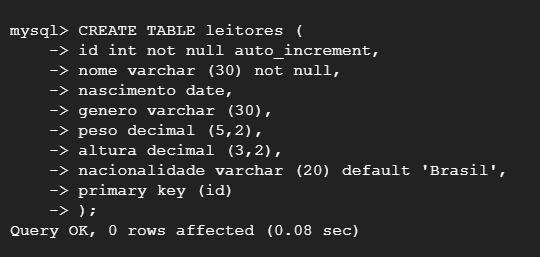

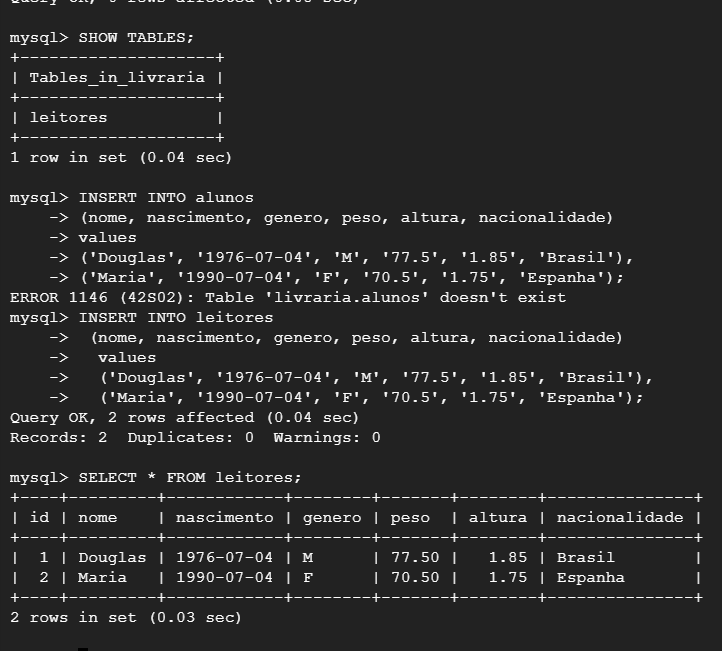

### **Manipulação de Tabelas**

#### **Criar registros**

 * **INSERT INTO tabela**

In [ ]:
'''
-> Criando registros de alunos na tabela alunos

INSERT INTO alunos
  (nome, nascimento, genero, peso, altura, nacionalidade)
  values
  ('Fulano','1955-04-13','M','96.6','1.75','Brasil'),
  ('Ciclano','1980-04-13','M','92.6','1.83','Brasil'),
  ('Beltrano','1985-04-13','F','65.6','1.70','Brasil'),
  ('Zé','2015-04-13','F','29.6','1.32','Brasil'),
  ('Ninguém','1986-04-13','F','72.6','1.75','Inglaterra');

-> Verificando se foram incluídos

SELECT * FROM alunos;
'''

#### **Alterar registros**

**ALTER TABLE nome**:
* **ADD COLUMN nome**
* **ADD COLUMN nome AFTER**
* **ADD COLUMN nome FIRST**

* Adicionando um novo atributo profissão na tabela alunos:

In [ ]:
'''
ALTER TABLE alunos
ADD COLUMN profissao VARCHAR (10);
'''

* Mudar posição do atributo profissao logo após nome:

In [ ]:
'''
ALTER TABLE alunos
ADD COLUMN profissao varchar (10) AFTER nome;

--> deu erro porque ja existe coluna profissão
-->é mais fácil trocar o nome dela e adicionar profissão na posição desejada.
'''

* Adicionar profissão logo após nome:

In [ ]:
'''
ALTER TABLE alunos
ADD COLUMN prof VARCHAR (10) AFTER nome;
'''

* Adicionar a coluna antes de todas as outras:

In [ ]:
'''
ALTER TABLE alunos
ADD COLUMN profi VARCHAR (10) FIRST;
'''


#### **Eliminar registros, renomear, modificar**

**ALTER TABLE nome**:
* **DROP COLUMN nome**
* **RENAME COLUMN nome TO nome_novo**
* **MODIFY COLUMN nome**
* **RENAME TO nome** - renomeia a tabela
* **UPDATE nome**



* Eliminando colunas (profi e profissao), ficaremos apenas com a coluna prof

In [ ]:
'''
ALTER TABLE alunos
DROP COLUMN profissao;

ALTER TABLE alunos
DROP COLUMN profi;
'''

* Renomear a coluna prof para profissao:

In [ ]:
'''
ALTER TABLE alunos
RENAME COLUMN prof TO profissao;

ALTER TABLE alunos
MODIFY COLUMN genero varchar (10) AFTER profissao
'''

* Mudar nome da tabela alunos para clientes:

In [ ]:
'''
ALTER TABLE alunos
RENAME TO clientes;

ALTER TABLE alunos
UPDATE alunos SET prof='' WHERE prof is NULL;

ALTER TABLE alunos
MODIFY COLUMN profissao varchar (20) NOT NULL DEFAULT 'Estudante';
'''



#### **Criar tabela checando se já existe alguma**

**CREATE TABLE IF NOT EXISTS nome**



In [ ]:
'''
Criar nova tabela clientes
CREATE TABLE if not exists clientes (
  nome varchar (30) NOT NULL,
  descricao text,
  idade int,
  nasc date
);

não gera erro porém não cria tabela.
'''

**Criar tabela cursos**

In [ ]:
'''
CREATE TABLE if not exists cursos (
  area varchar (30) NOT NULL,
  curso text,
  descricao text,  --> ADICIONEI ERRADO
  carga int,
  abertura date
);

SHOW TABLES;
SELECT * FROM cursos;
'''
'''
Incluir coluna idcurso na primeira posição:

ALTER TABLE cursos
ADD COLUMN idcurso int FIRST;
'''

#### **Transformar idcurso em chave primária:**

In [ ]:
'''
ALTER TABLE cursos
ADD PRIMARY KEY (idcurso);
'''

#### **Popular tabela cursos**

In [ ]:
'''
As colunas dos valores abaixo são: area, curso, carga, vagas, abertura

INSERT INTO cursos
values
 ('1','Humanas','Latras','3000','80','2014-01-01'),
 ('2','Bio','Medicina','5000','40','2014-01-01'),
 ('3','Exatas','Engenharia','4000','50','2014-01-01'),
 ('4','Exatas','ADSS','3500','40','2010-01-01'),
 ('5','Exatas','Mat','3000','40','2000-01-01'),
 ('6','Bio','enfermagem','3000','40','2016-01-01'),
 ('7','Humanas','Filosofia','4000','30','2016-01-01'),
 ('8','Humanas','Geografia','4000','30','2018-01-01'),
 ('9','Exatas','Bancos de Dados','3000','30','2018-01-01'),
 ('10','Bio','Fisioterapis','4000','30','2018-01-01');

 ALTER TABLE cursos
 RENAME COLUMN carga to vagas;

 ALTER TABLE cursos
 RENAME COLUMN descricao to carga;

'''

#### **Modificar tuplas linha por linha**

* **UPDATE/SET/WHERE**

* **DELETE FROM**

* **LIMIT 1**

In [ ]:
'''
-> Corrigir onde está Latras para Letras

UPDATE cursos
SET curso = 'Letras'
WHERE idcurso = '1';

-> Corrigir onde está Fisioterapis para Fisioterapia

UPDATE cursos
SET curso = 'Fisioterapia'
WHERE idcurso = '10';

-> Corrigir onde está ADSS para ADS

UPDATE cursos
SET curso = 'ADS'
WHERE idcurso = '4';

-> Corrigir onde está enfermagem para Enfermagem e mudar vagas para 100

UPDATE cursos
SET curso = 'Enfermagem', vagas = '100'
WHERE idcurso = '6';

-> Deletar o curso de banco de dados

DELETE from cursos
WHERE idcurso = '9';

-> Deletar todos os cursos que tenham 30 vagas

DELETE FROM cursos
WHERE vagas = '30';

-> Agora vamos deletar o primeiro curso que apareça na tabela com abertura = 2014-01-01

DELETE FROM cursos
WHERE abertura = '2014-01-01'
LIMIT 1;
'''

#### Excluir todos os registros ou tuplas,
mas manter a tabela no banco de dados (na prática elimina os dados da tabela):**

* **TRUNCATE TABLE**


In [ ]:
# TRUNCATE TABLE cursos;

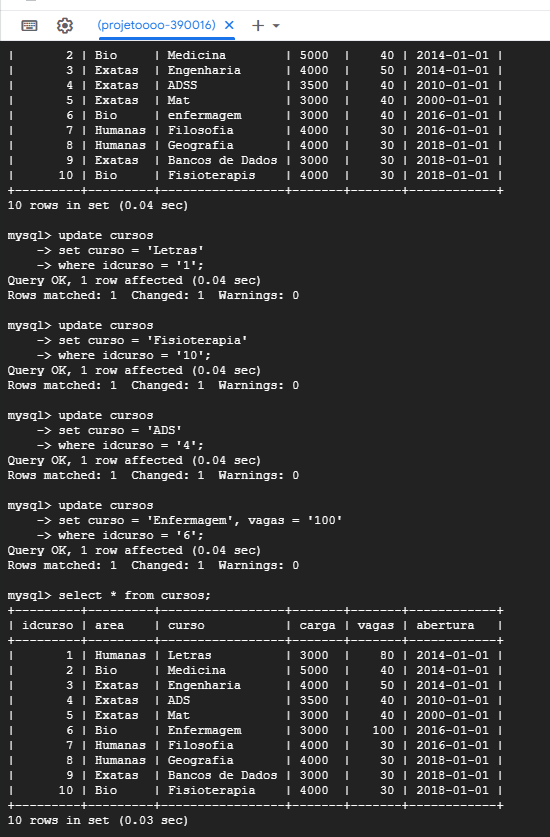

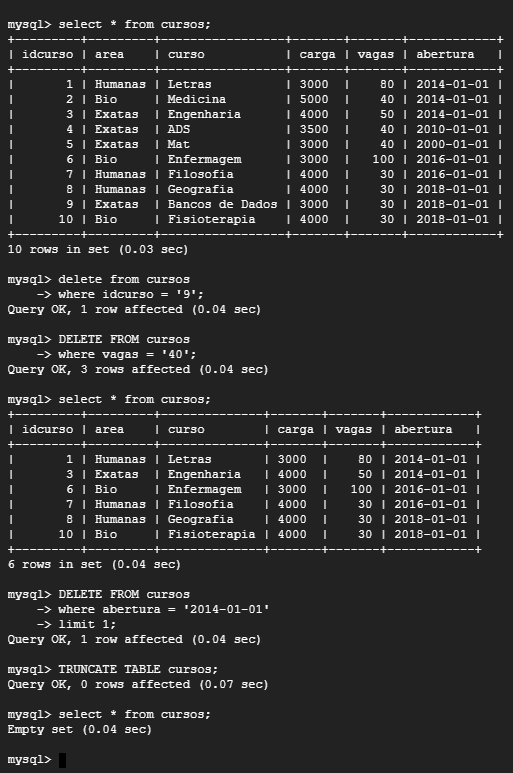

## **Novo Banco de Dados (loja)**

* Criar 6 tabelas e suas relações referentes a uma loja de utensílios domésticos
tabelas:

* Cliente, Pedido, Produto, ItemPedido, Categoria, ProdutoCategoria

In [ ]:
'''
CREATE DATABASE loja;
USE loja;

CREATE TABLE Cliente (
  id_cliente INT PRIMARY KEY,
  nome VARCHAR (50),
  endereco VARCHAR (100)
  telefone VARCHAR (13)
);

CREATE TABLE Pedido (
  id_pedido INT PRIMARY KEY,
  id_cliente INT,
  descricao VARCHAR(100),
  FOREIGN KEY (id_cliente) REFERENCES Cliente(id_cliente)
);

CREATE TABLE Produto (
  id_produto INT PRIMARY KEY,
  nome VARCHAR(50),
  preco DECIMAL(10, 2)
);

CREATE TABLE ItemPedido (
  id_item INT PRIMARY KEY,
  id_pedido INT,
  id_produto INT,
  quantidade INT,
  FOREIGN KEY (id_pedido) REFERENCES Pedido(id_pedido),
  FOREIGN KEY (id_produto) REFERENCES Produto(id_produto)
);

CREATE TABLE Categoria (
  id_categoria INT PRIMARY KEY,
  nome VARCHAR (50)
);

CREATE TABLE ProdutoCategoria (
  id_produto INT,
  id_categoria INT,
  PRIMARY KEY (id_produto,id_categoria),
  FOREIGN KEY (id_produto) REFERENCES Produto(id_produto),
  FOREIGN KEY (id_categoria) REFERENCES Categoria(id_categoria)
);
'''

* **Popular tabela com 20 transações comerciais**

In [ ]:
'''

Agora vamos popular as 6 tabelas com dados referentes a 20 transações comerciais
dessa loja
'''
'''
INSERT INTO Cliente (id_cliente, nome, endereco)
VALUES
    (1, 'Douglas', 'SP'),
    (2, 'Daniela', 'SP'),
    (3, 'Ester', 'MG'),
    (4, 'Maria', 'BA'),
    (5, 'Douglas', 'PE'),
    (6, 'Raimundo', 'CE'),
    (7, 'Jucimara', 'GO'),
    (8, 'Marlene', 'AC'),
    (9, 'Douglas', 'MA'),
    (10, 'Daniela', 'PI'),
    (11, 'Pedro', 'PB'),
    (12, 'Joaquim', 'RS'),
    (13, 'Julio', 'TO'),
    (14, 'Carla', 'DF'),
    (15, 'Bianca', 'PA'),
    (16, 'Sandra', 'SP'),
    (17, 'Celso', 'SP'),
    (18, 'Silvana', 'BA'),
    (19, 'Raquel', 'BA'),
    (20, 'Pedro', 'SP');
'''
'''
INSERT INTO Pedido (id_pedido, id_cliente, descricao)
VALUES
    (1, '1', 'Caneca'),
    (2, '1', 'Garfo'),
    (3, '2', 'Faca'),
    (4, '5', 'Copo'),
    (5, '19', 'Copo'),
    (6, '19', 'Colher'),
    (7, '15', 'Colher'),
    (8, '8', 'Colher'),
    (9, '2', 'Copo'),
    (10, '19', 'Colher'),
    (11, '6', 'Copo'),
    (12, '11', 'Colher'),
    (13, '10', 'Garfo'),
    (14, '4', 'Garfo'),
    (15, '3', 'Colher'),
    (16, '3', 'Garfo'),
    (17, '2', 'Copo'),
    (18, '17', 'Garfo'),
    (19, '14', 'Caneca'),
    (20, '13', 'Caneca');
'''
'''
INSERT INTO Produto (id_produto, nome, preco)
VALUES
    (1, 'Caneca', 15.99),
    (2, 'Garfo', 5.99),
    (3, 'Faca', 7.99),
    (4, 'Colher', 3.99),
    (5, 'Copo', 10.99);
'''

'''
INSERT INTO ItemPedido (id_item, id_pedido, id_produto, quantidade)
VALUES
    (1, 1, 1, 2),
    (2, 2, 2, 5),
    (3, 3, 3, 7),
    (4, 4, 5, 10),
    (5, 5, 5, 11),
    (6, 6, 4, 30),
    (7, 7, 4, 32),
    (8, 8, 4, 44),
    (9, 9, 5, 13),
    (10, 10, 4, 33),
    (11, 11, 5, 34),
    (12, 12, 4, 32),
    (13, 13, 2, 33),
    (14, 14, 2, 34),
    (15, 15, 4, 27),
    (16, 16, 2, 18),
    (17, 17, 5, 17),
    (18, 18, 2, 33),
    (19, 19, 1, 50),
    (20, 20, 1, 47);
'''
'''
INSERT INTO Categoria (id_categ, nome)
VALUES
    (1, 'Comer'),
    (2, 'Beber');

INSERT INTO ProdutoCategoria (id_produto, id_categ)
VALUES
    (1, 2),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 2);
'''

## Principais comandos de Consulta

### **SELECT**

In [ ]:
'''
colocar os selects * from para consulta de cada banco populado

-- seta o banco de dados, indica que usaremos o banco de dados loja

USE loja;

SELECT * FROM Cliente;

SELECT * FROM Pedido;

SELECT * FROM Produto;

SELECT * FROM ItemPedido;

SELECT * FROM Categoria;

SELECT * FROM ProdutoCategoria;


-- Warning: Evite o uso do *, seja específico, adicione apenas as colunas que irá precisar na sua análise.
-- Exemplo:

SELECT id_produto, quantidade FROM ItemPedido;
  Lendo o comando: Seleciona as colunas: id_produto e quantidade da tabela ItemPedido

'''

### **WHERE**

- Seleciona as colunas: id_produto e quantidade da tabela: ItemPedido, quando o quando a quantidade for maior ou igual a 10


In [ ]:
'''
SELECT id_produto, quantidade FROM ItemPedido
WHERE quantidade >= 10;
'''

- Seleciona todas as colunas, quando o quando o endereço for igual a SP

In [ ]:
'''
SELECT * FROM Cliente
WHERE endereco = 'SP';

SELECT * FROM Cliente
WHERE telefone = '5511';
'''

### **DISTINCT**

- Seleciona distintamente as colunas: id_produto e quantidade da tabela: ItemPedido, quando o quando a quantidade for maior ou igual a 10.

In [ ]:
'''
SELECT distinct id_produto, quantidade FROM ItemPedido
WHERE quantidade >= 10;
'''

- Seleciona distintamente as colunas: id_produto e quantidade da tabela: ItemPedido, quando o quando a quantidade for maior ou igual a 10.

In [ ]:
'''
SELECT distinct descricao FROM Pedido;

SELECT distinct id_cliente FROM Pedido;
'''

### **LIMIT — Retornar os n primeiros registros**

- Seleciona todos os atributos da tabela Cliente
- Mostra apenas os cinco primeiros registros

In [ ]:
'''
SELECT * FROM Cliente
LIMIT 5;
'''

### **BOOLEANOS ( E | OU | NÃO ) - Combinar com WHERE**

**Exemplo de AND**

- Seleciona as colunas: nome e endereco da tabela: Clientes,
apenas os registros com endereco igual a 'BA' e id_cliente igual a 19

In [ ]:
'''
SELECT nome, endereco
FROM Cliente
WHERE endereco = 'BA'
AND id_cliente = 19;
'''

**Exemplo de OR**

- Seleciona as colunas: nome e endereco da tabela: Clientes,
apenas os registros com endereco igual a 'SP' ou endereco igual a 'MG'


In [ ]:
'''
SELECT nome, endereco
FROM Cliente
WHERE endereco = 'SP'
OR endereco = 'MG';
'''

**Exemplo de NOT**

- Seleciona as colunas: nome e endereco da tabela: Clientes,
apenas os registros onde o endereço não seja igual a 'SP'


In [ ]:
'''
SELECT nome, endereco
FROM Cliente
WHERE NOT endereco = 'SP';
'''

### **Funções de agregação (SUM , AVG , MAX , MIN , COUNT e ROUND)**

- **SUM** Somatório da quantidade de produtos vendidos

In [ ]:
'''
SELECT SUM(quantidade) AS soma_qtde
FROM ItemPedido;
'''

- **AVG** Média da quantidade de produtos vendidos

In [ ]:
'''
SELECT AVG(quantidade) AS media_qtde,
ROUND(AVG(quantidade),2) AS media_qtde_arredondado
FROM ItemPedido;
'''

- **MAX** Máximo da quantidade de produtos vendidos

In [ ]:
'''
SELECT MAX(quantidade) AS maior_quantidade_venda
FROM ItemPedido;

SELECT MAX(preco) AS maior_preco, nome
FROM Produto;

'''

- **MIN** Mínimo da quantidade de produtos vendidos

In [ ]:
'''
SELECT MIN(quantidade)  menor_quantidade_venda
FROM ItemPedido;
'''

- **COUNT** Contagem da quantidade de produtos vendidos

In [ ]:
'''
SELECT COUNT(id_produto) as qtd_produtos
FROM Produto;
'''

- **ROUND** Arredondar

In [ ]:
'''
SELECT SUM(quantidade) AS soma_qtde
FROM ItemPedido;
'''

### **Atividade**

In [ ]:
'''
UPDATE Cliente
SET telefone='5531'
WHERE endereco='MG';

UPDATE Cliente
SET telefone='5571'
WHERE endereco='BA';

SELECT * FROM Cliente
WHERE telefone='5511'
OR telefone='5531'
OR telefone='5571';

'''

### **GROUP BY**
* Seleciona endereço e contagem, renomeada como 'freq'
da tabela Cliente, agrupado por endereco

In [ ]:
'''
SELECT endereco,
     count(*) AS 'freq'
FROM Cliente
GROUP BY endereco;
'''

### **HAVING**
* Seleciona endereço e contagem, renomeada como 'freq'
da tabela Cliente, agrupado por endereco

* Usa o **HAVING** para filtrar elementos que se repetem pelo menos 2x.

In [ ]:
'''
  SELECT endereco,
      count(*) AS 'freq'
  FROM Cliente
  GROUP BY endereco
  HAVING count(*) >1;
'''

### **UNION**
* Unir duas consultas e mostrar na mesma tabela:

 * id_pedido e id_produto da tabela ItemPedido: id_produto é 1
 * id_pedido e id_produto da tabela ItemPedido: id_produto é 4

In [ ]:
'''
SELECT id_pedido, id_produto
  FROM ItemPedido
WHERE id_produto = 1
UNION
SELECT id_pedido, id_produto
  FROM ItemPedido
WHERE id_produto = 4;
'''

### **IN BETWEEN**
* Selecionar id_pedido e id_produto da tabela ItemPedido
* onde id_produto seja igual a 1 ou igual a 2:
 * usando **WHERE** combinado com **OR**,
 * usando o **IN ()**


In [ ]:
'''
SELECT
  id_pedido,
  id_produto
FROM ItemPedido
WHERE id_produto = 1 OR id_produto = 2;

-> ou

SELECT
  id_pedido,
  id_produto
FROM ItemPedido
WHERE id_produto IN (1,2);
'''

* Selecionar id_pedido e id_produto da tabela ItemPedido
* onde id_produto seja igual a 1 ou igual a 2 usando o **IN**
* queremos também que o número do pedido esteja entre **(BETWEEN)** 1 e 9, para selecionar só id_pedido de 1 dígito.

In [ ]:
'''
SELECT
  id_pedido,
  id_produto
FROM ItemPedido
WHERE id_produto IN (1,2) AND
  id_pedido BETWEEN 1 AND 9;
'''

### **LIKE**
* Consulta na tabela Produto que retorne todos os produtos que terminem com a letra **o** e os seus respectivos ids

In [ ]:
'''
SELECT
  id_produto,
  nome
FROM Produto
WHERE nome LIKE '%o';
'''

* Produtos que comecem com a letra **C** e os seus respectivos ids

In [ ]:
'''
SELECT
  id_produto,
  nome
FROM Produto
WHERE nome LIKE 'C%';
'''

* Produtos que contenham a sequencia **lh** e os seus respectivos ids

In [ ]:
'''
SELECT
  id_produto,
  nome
FROM Produto
WHERE nome LIKE '%lh%';
'''

### **ORDER BY**
* Selecionar itens na tabela ItemPedido, ordenando de forma Crescente por quantidade

In [ ]:
'''
SELECT * FROM ItemPedido
ORDER BY quantidade ASC;
'''

### **REPLACE**
* Selecionar itens na tabela Produto, substituir O por OO na coluna nome.

In [ ]:
'''
SELECT nome
  REPLACE(nome,'o','oo') AS nome_errado
FROM Produto;
'''

### **LPAD**

In [ ]:
'''
SELECT id_pedido,
  LPAD(id_pedido, 5, "0")
FROM ItemPedido;
'''

### **SUBSTRING**

In [ ]:
'''
SELECT nome,
  SUBSTRING(nome, 1, 2) AS subs
FROM Produto;
'''

### **UPPER, LOWER, LENGTH**

In [ ]:
'''
SELECT nome,
  UPPER(nome)
FROM Produto;

SELECT nome,
  LOWER(nome)
FROM Produto;

SELECT nome,
  LENGTH(nome)
FROM Produto;
'''

### **CAST**

In [ ]:
'''
SELECT id_cliente,
       concat('Cliente - ', CAST(id_cliente AS CHAR)) AS id_cliente_texto
  FROM Cliente;
'''

### **CASE — Semelhante ao if/else**

*  Selecione os atributos id_pedido, quantidade da tabela ItemPedido
*  Se a quantidade for maior do que 30
  *  Classifique como atacado em linha separada
*  Caso seja menor que 30
   * Classifique como varejo
'''

In [ ]:
'''
SELECT id_pedido, quantidade,
	CASE WHEN quantidade > 30 THEN 'Atacado'
    ELSE 'Varejo' END
FROM ItemPedido;
'''

### **JOINS**

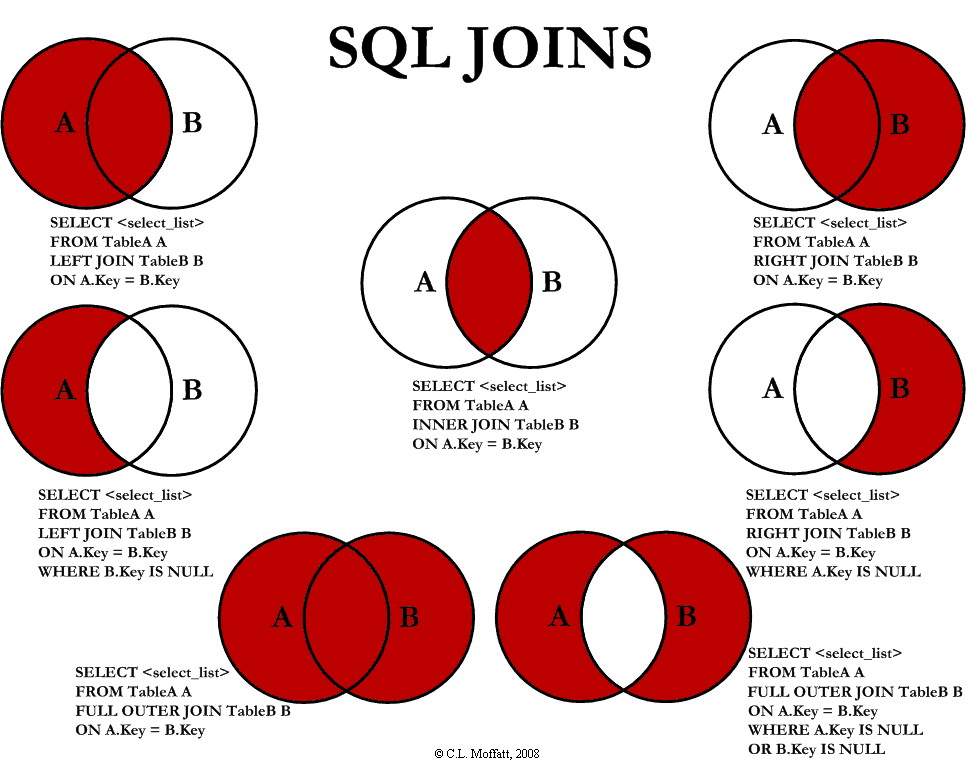

In [ ]:
'''
Inserindo novos clientes na tabela Cliente para melhorar a visualição dos joins
INSERT INTO Cliente (id_cliente, nome, endereco)
VALUES
    (21, 'Erick', 'BA'),
    (22, 'Denise', 'DF'),
    (23, 'Diana', 'SP'),
    (24, 'Dagmar', 'DF'),
    (25, 'Deiverson', 'SP');
'''

#### **INNER JOIN**

In [ ]:
'''
SELECT *
  FROM  ItemPedido v
  INNER JOIN ProdutoCategoria c
  ON  v.id_produto = c.id_produto;

'''

#### **LEFT/RIGHT JOIN**

In [ ]:
'''
SELECT *
  FROM Cliente c
  LEFT JOIN Pedido p
  ON p.id_cliente = c.id_cliente;
'''

In [ ]:
'''
Poderia utilizar ao invés de right um left invertendo a ordem das tabelas:

SELECT *
  FROM Cliente c
  RIGHT JOIN Pedido p
  ON p.id_cliente = c.id_cliente;

OU

SELECT *
  FROM Pedido p
  LEFT JOIN Cliente c
  ON p.id_cliente = c.id_cliente;
'''

#### **FULL OUTER JOIN (LEFT JOIN, UNION, LEFT JOIN)**

ps.: não tem Full Join em SQL, é necessário unir duas consultas.

* Tabela Cliente + Tabela Pedido

In [ ]:
'''
SELECT *
  FROM      Cliente c
  LEFT JOIN Pedido p ON p.id_cliente = c.id_cliente

UNION

SELECT *
  FROM      Pedido p
  LEFT JOIN Cliente c ON p.id_cliente = c.id_cliente;
'''